Rafał Nowak
# Numerical Optimization
## Problem set 3 (12 points)

**Submission deadline**: Thursday, 26.11.2020

* All submissions should contain single file.<br/>This can be single Jupyter notebook file (with extension `ipynb`) or ZIP archive in case the are some additional files needed.
* It is recommended to write the reports using LaTeX. 
* One can report the answers, comments and results in PDF or notebook file.
* All the source code should be written in Python or Julia.

**Problem 3.1** (3 pts)

In this problem we consider univariate function $f:\mathbb R\to\mathbb R$.
Let us remind the idea of bracketing method
> _Bracketing_ is the process of identifying an interval in which a local minimum lies and then successively shrinking the interval.

Implement the method `(a,b) = find_initial_bracket(f)` which for given function $f$ gives the bracketing interval $(a,b)$ such that there exist local minimum $c\in(a,b)$ satisfying $f(a)>f(c)<f(b)$.

```julia
function find_initial_bracket(f, x=0; s=1e-2, k=2.0)

end
```

```julia
# Example test
f(x) = 3*x^2 + exp(.3*x-9) + 20*x - 20
a, b = find_initial_bracket(f)
@show a, b
```
`(a, b) = (-5.109999999999999, -1.27)`

```julia
using Plotly
plot( f, a , b )
```
<a href="https://ibb.co/kXNfFMh"><img src="https://i.ibb.co/ZxqPCNh/f-bracket.png" alt="f-bracket" border="0"></a>

In [79]:
def find_initial_bracket(f, direction, x=0, s=1e-2, k=2.0):
    '''
    INPUT:
    - f; function of which the local minimum is to be found
    - direction; takes value of 1 or -1, indicates in which direction (+ve or -ve respectively)
    the search is conducted
    - x; initial point (default = 0)
    - s; initial step size (default = 1e-2)
    - k;, constant that we multiply s with after each iteration
    OUTPUT:
    - tuple with initial interval in which the local minima is found
    '''
    assert direction in [-1, 1], "direction argument should be either 1 or -1"
    s = direction * s
    bracket = [x, x + s]
    values = [f(x), f(x + s)]
    while True:
        s *= k
        x = x + s
        val = f(x)
        if val > values[-1]:
            bracket.append(x)
            break
        bracket.append(x)
        values.append(val)
    return(bracket[-1], bracket[-3])

-5.1 -1.2600000000000002


(-55, -40)

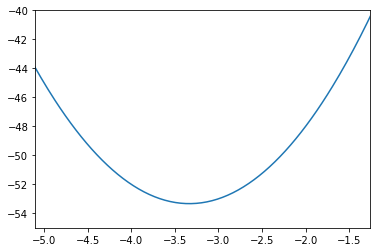

In [84]:
import numpy as np
from matplotlib import pyplot as plt

def test_f(x):
    return 3*x**2 + np.exp(0.3*x - 9) + 20*x - 20

# test our bracketing function with the provided test function
a, b = find_initial_bracket(f = test_f, direction = -1)
print(a,b)
domain = np.linspace(-10,10,1000)

plt.figure()
plt.plot(domain, test_f(domain))
plt.xlim(a, b)
plt.ylim(-55, -40)

# the minimum is at x = -3.3333..., clearly lying within the computed interval 

-0.30000000000000004 -0.06


(4.5, 5)

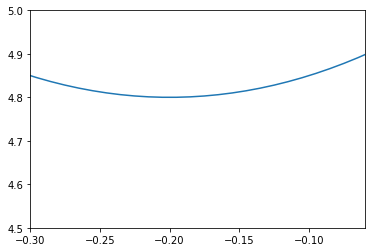

In [88]:
# further test our bracketing function with a simple quadratic
def quadratic(x):
    return 5*x**2 + 2*x + 5

a_q, b_q = find_initial_bracket(f = quadratic, direction = -1)
print(a_q, b_q)

domain = np.linspace(-5,5,1000)
plt.figure()
plt.plot(domain, quadratic(domain))
plt.xlim(a_q, b_q)
plt.ylim(4.5, 5)

# the local (and global) minimum is x = -0.2, clearly lying within the computed interval 

The important note regarding our function is that it requires some **prior knowledge** about the direction from the initial point in which we should proceed with iterations to obtain the bounded minimum. Alternatively, we could develop the function so that it performs the search in both directions and returns the bounded interval containing the first encountered minimum.

**Problem 3.2** (4 pts)

In this problem we consider [unimodal function](https://www.wikiwand.com/en/Unimodality#/Unimodal_function)
and will play with _golden section search_ method.

First you should implement the _Fibonacci search_ algorithm provided that you have the (global) array of Fibonacci numbers. Next you should implement the _golden section search_ which uses only _golden ratio_ $\varphi = (1+\sqrt 5)/2$.

* Implement the [Fibonacci search algorithm](https://www.wikiwand.com/en/Golden-section_search#/Fibonacci_search)<br/>`(a, b) = fibonacci_search(f, a, b, n; ε=1e-4)`<br/>to be run on univariate function $f$, with bracketing interval $[a, b]$, for $n > 1$ function evaluations. It should return the new interval $(a, b)$. The optional parameter $\varepsilon$ should control the lowest-level interval length.
* Implement [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)<br/>`(a, b) = gs_search(f, a, b, n)`<br/> to be run on a univariate function $f$ , with bracketing interval $[a, b]$ , for $n > 1$ function evaluations. It returns the new interval $(a, b)$. Guaranteeing convergence to within $\varepsilon$ requires $n = (b-a)/(\varepsilon \ln\varphi)$.

Present the results on various kind of functions.

References:
- [Fibonacci Search in Optimization of Unimodal Functions](https://www.maplesoft.com/applications/view.aspx?SID=4193&view=html)
- [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)

In [ ]:
def fibonacci_search(f, a, b, n, eps=1e-4):
    return 1

def gs_search(f, a, b, n):
    return 2

In [ ]:
'''

# define the function which finds the initial bracket
def find_initial_bracket(f, b=0, s=1e-2, k=2.0):
    # set initial boundaries for the interval
    a = -10e6 
    c = 10e6
    # define the initial interval:
    # a, c - left and right outermost points respectively
    # b - some point s.t. a < b < c
    bracket = [a, b, c]
    while True:
        # get random value from the interval [a,c]
        x = np.random.uniform(low = bracket[0], high = bracket[2])
        val = f(x)
        # now x is either smaller or greater than the in-between point b in the interval,
        # also f(x) either smaller or greater than f(b) - get 4 different outcomes in total
        if x < bracket[1]:
            # x is between a and b
            if val < f(bracket[1]):
                # b and x become the right end of the interval and the in-between point respectively
                bracket[1], bracket[2] = x, bracket[1]
            else:
                # x becomes the left end of the interval
                bracket[0] = x
        else:
            # x is between b and c
            if val < f(bracket[1]):
                # b and x become the left end of the interval and the in-between point respectively
                bracket[0], bracket[1] = bracket[1], x
            else:
                # x becomes the right end of the interval
                bracket[2] = x
        # compute the length of the interval
        d = bracket[2] - bracket[0]
        # if smaller than desired interval width - break and return the interval
        if d < k:
            break
    return(bracket[0], bracket[2])'''

**Problem 3.3 (5 pts)**
Consider the [Rosenbrock's function](https://www.wikiwand.com/en/Rosenbrock_function)
$$ f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2 $$
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/640px-Rosenbrock_function.svg.png">

1. (3 pts) Implement the function that takes the (column) vector $x\in \mathbb R^2$ and returns the value, gradient and Hessian matrix of the Rosenbrock's function at point $x$.
```julia
function rosenbrock (x)
    ...
    return f, ∇, H
end
```
2. (2 pts) Plot the following graphs:
  * contours
  * 3-dimensional view of the surface

In [41]:
# define a function which computes the value, gradient and hessian matrix of the Rosenbrock's
# function at point x from R^2

def rosenbrock(x):
    '''
    input: x, a 2-dimensional column vector with coordinates
    output: a tuple with
    - value of the rosenbrock function at point x
    - gradient of the rosenbrok function at point x
    - hessian matrix of the rosenbrock function at point x
    '''
    # compute value at x 
    value = (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    # compute the gradient at x, grad(f) = (df/dx_1, df/dx_2)
    dfdx = -2 + 2 * x[0] - 400 * x[0] * (x[1] - x[0]**2)
    dfdy = 200 * (x[1] - x[0]**2)
    grad = np.array([dfdx, dfdy])
    # compute the hessian, Hf(x) 
    d2fdx2 = -400 * x[1] + 1200 * x[0]**2 + 2 
    d2fdy2 = -200
    d2fdxdy = -400 * x[0]
    H = np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])
    return(value, grad, H)